In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [2]:
from sklearn import linear_model

linear_model?


In [3]:
data=pd.read_excel('C:/Users/Mahendran/Downloads/nptel-DA/lrm.xlsx')

In [4]:
data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


<function matplotlib.pyplot.show(*args, **kw)>

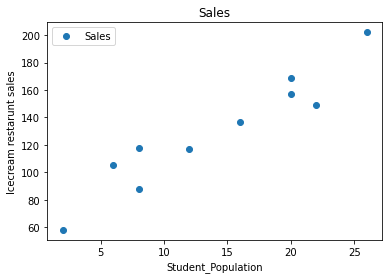

In [5]:
data.plot('Student_Population','Sales',style='o')
plt.ylabel('Icecream restarunt sales')
plt.title('Sales')
plt.show

In [6]:
import statsmodels.api as s
s_pop=data['Student_Population']
sales=data['Sales']
st_pop=s.add_constant(s_pop)
model1=s.OLS(sales,st_pop)
result1=model1.fit()
result1.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           2.55e-05
Time:                        08:14:24   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
x=data['Student_Population'].values.reshape(-1,1)
y=data['Sales'].values.reshape(-1,1)
res=LinearRegression()
res.fit(x,y)

LinearRegression()

In [8]:
res.intercept_[0],res.coef_[0][0]

(60.0, 5.0)

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


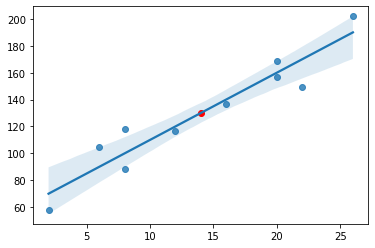

In [9]:
plt.figure()
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color="red")

In [10]:
from statsmodels.stats.outliers_influence import summary_table
st,data1,ss2=summary_table(result1,alpha=0.05)
fittedvalues=data1[:,2]
pedict_mean_se=data1[:,3]
predict_mean_ci_low,predict_mean_ci_upp=data1[:,4:6].T
predict_ci_low,predict_ci_upp=data1[:,6:8].T

In [11]:
data1

array([[ 1.00000000e+00,  5.80000000e+01,  7.00000000e+01,
         8.22258569e+00,  5.10386834e+01,  8.89613166e+01,
         3.28983415e+01,  1.07101658e+02, -1.20000000e+01,
         1.11193113e+01, -1.07920353e+00,  3.18447433e-01],
       [ 2.00000000e+00,  1.05000000e+02,  9.00000000e+01,
         6.37764030e+00,  7.52931351e+01,  1.04706865e+02,
         5.48817226e+01,  1.25118277e+02,  1.50000000e+01,
         1.22709292e+01,  1.22240131e+00,  2.01819329e-01],
       [ 3.00000000e+00,  8.80000000e+01,  1.00000000e+02,
         5.58985500e+00,  8.71097713e+01,  1.12890229e+02,
         6.56029139e+01,  1.34397086e+02, -1.20000000e+01,
         1.26492498e+01, -9.48672859e-01,  8.78768540e-02],
       [ 4.00000000e+00,  1.18000000e+02,  1.00000000e+02,
         5.58985500e+00,  8.71097713e+01,  1.12890229e+02,
         6.56029139e+01,  1.34397086e+02,  1.80000000e+01,
         1.26492498e+01,  1.42300929e+00,  1.97722921e-01],
       [ 5.00000000e+00,  1.17000000e+02,  1.2000000

In [12]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [13]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [14]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [15]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

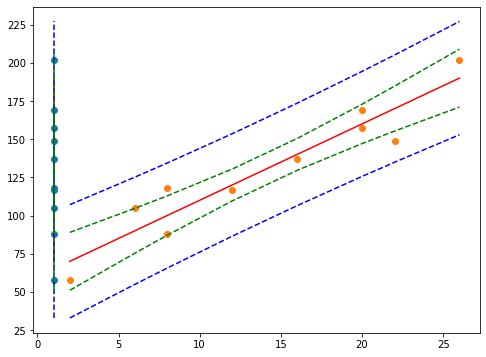

In [16]:
X=s.add_constant(x)
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(X,y,'o',label='data')
ax.plot(X,fittedvalues,'r-',label='OLS')
ax.plot(X,predict_ci_low,'b--')
ax.plot(X,predict_ci_upp,'b--')
ax.plot(X,predict_mean_ci_low,'g--')
ax.plot(X,predict_mean_ci_upp,'g--')

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


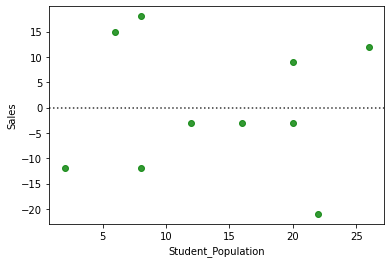

In [17]:
sns.residplot(data['Student_Population'],data['Sales'],color='g')

In [21]:
from statsmodels.stats.anova import anova_lm
df1=pd.read_excel('C:/Users/Mahendran/Downloads/nptel-DA/icecream.xlsx')
df1

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


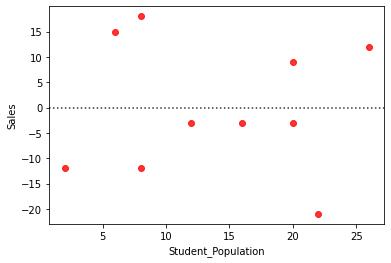

In [22]:
sns.residplot(df1['Student_Population'],df1['Sales'],color='r')

In [24]:
from statsmodels.formula.api import ols
reg1=ols(formula='Sales~Student_Population',data=df1)
Fit1=reg1.fit()
Fit1.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           2.55e-05
Time:                        08:26:47   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
anova_lm(Fit1)

,df,sum_sq,mean_sq,F,PR(>F)
Student_Population,1.0,14200.0,14200.00,74.248366,0.000025
Residual,8.0,1530.0,191.25,NaN,NaN


In [29]:
influence=Fit1.get_influence()
resid_student=influence.resid_studentized_external
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

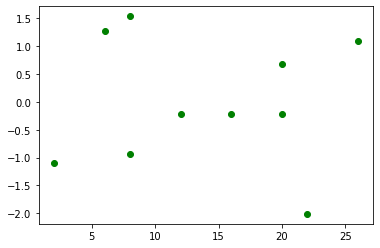

In [30]:
plt.figure()
plt.scatter(df1['Student_Population'],resid_student,color="green")

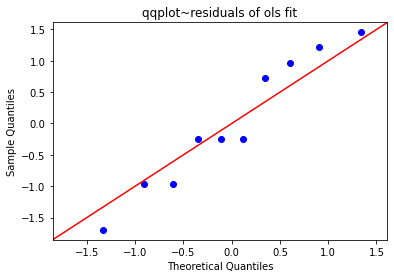

In [32]:
res=Fit1.resid
probplot=s.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qqplot~residuals of ols fit')
plt.show()